In [ ]:
#%%

###  ch12. 因子分析（factor_analyzer包）
#########################################

# 12.1 因子分析的数学原理
# 12.2 使用FactorAnalyzer包做因子分析示例
# 12.3 因子分析完整程序
# 12.4 因子分析（主成分分析）在金融中的应用（教材的例子）

# 导入相关的包
# pip install factor_analyzer
import pandas as pd
import yfinance as yf
import numpy as np
import numpy.linalg as nlg
from numpy import *
from sklearn import preprocessing
from sklearn.decomposition import KernelPCA  #主成分分析
from factor_analyzer import FactorAnalyzer  #pip install factor_analyzer
from factor_analyzer import *
import math as math
from scipy.stats import bartlett
from matplotlib import cm
import matplotlib.pyplot as plt

In [ ]:
#%%

# 12.1 因子分析的数学原理
#########################

# 因子分析: 一种统计方法，用于描述观察到的变量之间的相关性，将这些变量归因于较少的未观察到的变量，称为因子
# 主成分分析: 一种降维技术，它将多个相关变量转换为少数几个不相关变量，这些不相关变量是原始变量的线性组合

In [ ]:
#%%

# 12.2 使用FactorAnalyzer包做因子分析示例
########################################

data = pd.read_csv("./data/FAdata01.csv",encoding = "gbk")
#print(data)
del data['ID']

# 数据均值规范化
data1 = data.iloc[:,1:]  
data2 = preprocessing.scale(data1)

# 相关系数矩阵、特征值
c = np.corrcoef(data2)
np.linalg.eigvals(c)

# 确定公共因子个数，以解释度达到80%为标准
fa = FactorAnalyzer(3,rotation=None)  #固定公共因子个数为3个
fa.fit(data2) 
var = fa.get_factor_variance()#给出贡献率
print("\n解释的总方差（即贡献率）:\n", var)

# 初始因子载荷矩阵
fa.loadings_  #成分矩阵
print("\n成分矩阵:\n", fa.loadings_ )

# 因子旋转、旋转后因子载荷矩阵
fa1 = FactorAnalyzer(3,rotation='varimax')  
fa1.fit(data2) 
fa1.loadings_
print("\n旋转后因子载荷矩阵（方差最大法）:\n", fa1.loadings_ )

# 因子得分矩阵
a = fa1.transform(data2)
print("\n因子得分矩阵:\n", a)


解释的总方差（即贡献率）:
 (array([3.60927443, 1.72407635, 0.87791753]), array([0.18046372, 0.08620382, 0.04389588]), array([0.18046372, 0.26666754, 0.31056342]))

成分矩阵:
 [[-8.18324021e-02 -7.72741415e-02  3.92104139e-01]
 [-5.58059669e-02  5.58013777e-01  1.02145855e-01]
 [ 2.44382171e-01 -2.42845569e-01 -2.57094058e-01]
 [-1.48308488e-01  7.75251450e-01  3.45656355e-01]
 [-4.61676379e-02  6.21994656e-01  7.18055188e-03]
 [ 1.68828560e-01 -4.46301922e-02  3.33840505e-02]
 [ 6.31542190e-01  4.80354661e-02  1.15087966e-01]
 [ 5.77260943e-01 -1.02599850e-01  8.62212540e-02]
 [ 5.70703136e-01 -1.98386467e-02  1.98930847e-01]
 [ 2.61373977e-01  2.83688028e-01 -4.42435123e-01]
 [ 9.38345765e-02  4.38205046e-01 -4.17690265e-01]
 [ 4.91936068e-01  2.91083497e-02 -7.62605800e-02]
 [ 3.95214882e-01  9.05609993e-02 -6.65624281e-02]
 [ 4.76632998e-01  1.55534748e-01  6.22973693e-03]
 [ 2.65348654e-01  1.70101282e-01 -2.26447409e-01]
 [ 5.52795523e-01  3.15402735e-02  1.09863130e-01]
 [ 6.25406631e-01 -5.151

d:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



原始数据:
       ID  性别  所在地域  年龄  学历  职业  月收入  价格  口感  新鲜程度  ...  原产地  平台交易安全  \
0      1   2     2   2   4   1    1   4   5     4  ...    3       4   
1      2   2     2   2   4   1    1   4   4     4  ...    2       3   
2      3   2     4   2   4   1    1   4   4     4  ...    3       4   
3      4   2     4   2   4   1    1   4   4     5  ...    4       4   
4      5   2     2   2   4   1    2   4   4     4  ...    4       4   
..   ...  ..   ...  ..  ..  ..  ...  ..  ..   ...  ...  ...     ...   
175  176   2     2   3   5   2    4   4   3     5  ...    3       3   
176  177   2     3   4   1   2    3   4   5     5  ...    3       4   
177  178   2     1   2   3   1    1   4   5     5  ...    4       4   
178  179   2     4   4   1   2    3   4   5     5  ...    3       3   
179  180   1     1   2   5   1    1   5   5     5  ...    5       4   

     平台页面设计简洁易操作  平台信息真实  平台有效率的监督投诉机制  商家信誉和口碑  商家回复及时性  商家水果相关信息介绍全面  商家物流  \
0              4       5             4        4        4   

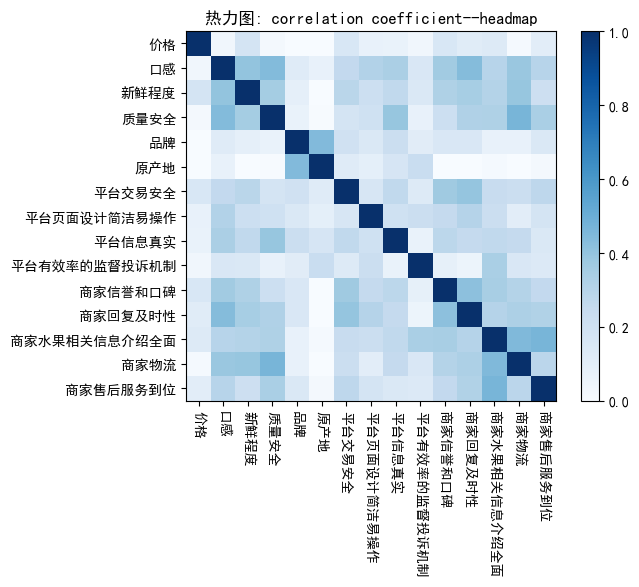


KMO测度: 0.8209758414728693

巴特利特球形检验: BartlettResult(statistic=np.float64(1.6617832016160863), pvalue=np.float64(0.9999736648990653))

特征值
：            names  eig_value
0             价格   4.211199
1             口感   1.569913
2           新鲜程度   1.166964
3           质量安全   1.140386
4             品牌   0.948798
5            原产地   0.887488
6         平台交易安全   0.795197
8         平台信息真实   0.708310
9   平台有效率的监督投诉机制   0.659255
10       商家信誉和口碑   0.588482
11       商家回复及时性   0.549096
14      商家售后服务到位   0.501219
13          商家物流   0.468435
12  商家水果相关信息介绍全面   0.441900
7    平台页面设计简洁易操作   0.363358

特征向量
                     价格        口感      新鲜程度      质量安全        品牌       原产地  \
价格            0.092837 -0.155223  0.615627 -0.195474 -0.077780 -0.558397   
口感            0.332392 -0.036767 -0.140530  0.171559  0.262123  0.046760   
新鲜程度          0.300914 -0.161900  0.039360  0.045976  0.134144 -0.293306   
质量安全          0.303356 -0.138506 -0.394017  0.170169 -0.006174 -0.193917   
品牌            0.140707  

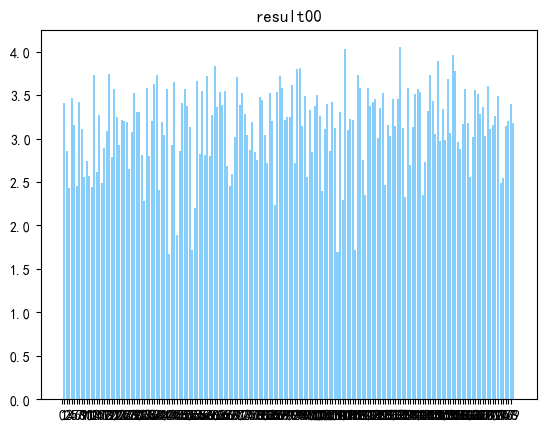

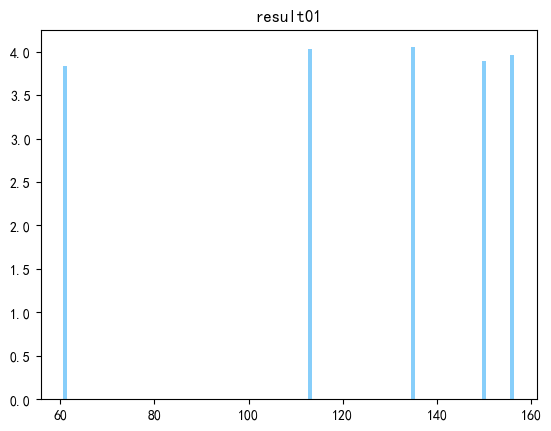

In [ ]:
#%%

# 12.3 因子分析完整程序
######################

df= pd.read_csv("./data/FAdata01.csv",encoding = "gbk")
# print(df)
df2=df.copy()
print("\n原始数据:\n",df2)
del df2['ID']
df2.drop(df.columns[[1,2,3,4, 5,6]], axis=1, inplace=True)
#print(df2)
# 皮尔森相关系数
df2_corr=df2.corr()
print("\n相关系数:\n",df2_corr)

#热力图4h1
cmap = cm.Blues
    
#下面参数为了图形中显示中文，不加会提示missing from current font错误等
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['font.serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False #显示负数不乱码
    
fig=plt.figure()
ax=fig.add_subplot(111)
map = ax.imshow(df2_corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('热力图: correlation coefficient--headmap')
plt.xticks(rotation=270) #让横坐标刻度竖着显示

ax.set_yticks(range(len(df2_corr.columns)))
ax.set_yticklabels(df2_corr.columns)
ax.set_xticks(range(len(df2_corr)))
ax.set_xticklabels(df2_corr.columns)
plt.colorbar(map)
plt.show()

# KMO测度
def kmo(dataset_corr):
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    A = np.ones((nrow_inv_corr, ncol_inv_corr))
    for i in range(0, nrow_inv_corr, 1):
        for j in range(i, ncol_inv_corr, 1):
            A[i, j] = -(corr_inv[i, j]) / (math.sqrt(corr_inv[i, i] * corr_inv[j, j]))
            A[j, i] = A[i, j]
    dataset_corr = np.asarray(dataset_corr)
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    return kmo_value
print("\nKMO测度:", kmo(df2_corr))
# 巴特利特球形检验
df2_corr1 = df2_corr.values
print("\n巴特利特球形检验:", bartlett(df2_corr1[0], df2_corr1[1], df2_corr1[2], df2_corr1[3], df2_corr1[4],
                                    df2_corr1[5], df2_corr1[6], df2_corr1[7], df2_corr1[8], df2_corr1[9],
                                    df2_corr1[10], df2_corr1[11], df2_corr1[12], df2_corr1[13], df2_corr1[14]))


# 求特征值和特征向量
eig_value, eigvector = nlg.eig(df2_corr)  # 求矩阵R的全部特征值，构成向量
eig = pd.DataFrame()
eig['names'] = df2_corr.columns
eig['eig_value'] = eig_value
eig.sort_values('eig_value', ascending=False, inplace=True)
print("\n特征值\n：",eig)
eig1=pd.DataFrame(eigvector)
eig1.columns = df2_corr.columns
eig1.index = df2_corr.columns
print("\n特征向量\n",eig1)

# 求公因子个数m,使用前m个特征值的比重大于85%的标准，选出了公共因子是五个
for m in range(1, 15):
    if eig['eig_value'][:m].sum() / eig['eig_value'].sum() >= 0.85:
        print("\n公因子个数:", m)
        break
# 因子载荷阵
A = np.asmatrix(np.zeros((15, 5)))
i = 0
j = 0
while i < 5:
    j = 0
    while j < 15:
        A[j:, i] = math.sqrt(eig_value[i]) * eigvector[j, i]
        j = j + 1
    i = i + 1
a = pd.DataFrame(A)
a.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
a.index = df2_corr.columns
print("\n因子载荷阵\n", a)
fa = FactorAnalyzer(n_factors=5)
fa.loadings_ = a
# print(fa.loadings_)
print("\n特殊因子方差:\n", fa.get_communalities())  # 特殊因子方差，因子的方差贡献度 ，反映公共因子对变量的贡献
var = fa.get_factor_variance()  # 给出贡献率
print("\n解释的总方差（即贡献率）:\n", var)
# 因子旋转
rotator = Rotator()
b = pd.DataFrame(rotator.fit_transform(fa.loadings_))
b.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
b.index = df2_corr.columns
print("\n因子旋转:\n", b)
# 因子得分
X1 = np.asmatrix(df2_corr)
X1 = nlg.inv(X1)
b = np.asmatrix(b)
factor_score = np.dot(X1, b)
factor_score = pd.DataFrame(factor_score)
factor_score.columns = ['factor1', 'factor2', 'factor3', 'factor4', 'factor5']
factor_score.index = df2_corr.columns
print("\n因子得分：\n", factor_score)
fa_t_score = np.dot(np.asmatrix(df2), np.asmatrix(factor_score))
print("\n应试者的五个因子得分：\n",pd.DataFrame(fa_t_score))
# 综合得分
wei = [[0.50092], [0.137087], [0.097055], [0.079860], [0.049277]]
fa_t_score = np.dot(fa_t_score, wei) / 0.864198
fa_t_score = pd.DataFrame(fa_t_score)
fa_t_score.columns = ['综合得分']
fa_t_score.insert(0, 'ID', range(1,181))
print("\n综合得分：\n", fa_t_score)
print("\n综合得分：\n", fa_t_score.sort_values(by='综合得分', ascending=False).head(6))
    
plt.figure()
ax1=plt.subplot(111)
X=fa_t_score['ID']
Y=fa_t_score['综合得分']
plt.bar(X,Y,color="#87CEFA")
# plt.bar(X, Y, color="red")
plt.title('result00')
ax1.set_xticks(range(len(fa_t_score)))
ax1.set_xticklabels(fa_t_score.index)
plt.show()
fa_t_score1=pd.DataFrame()
fa_t_score1=fa_t_score.sort_values(by='综合得分',ascending=False).head()
plt.subplot(111)
X1 = fa_t_score1['ID']
Y1 = fa_t_score1['综合得分']
plt.bar(X1, Y1, color="#87CEFA")
# plt.bar(X1, Y1, color='red')
plt.title('result01')
plt.show()

In [ ]:
# %%

# 12.4 因子分析（主成分分析）在金融中的应用（教材的例子）
###################################################

# 主成分分析是因子分析的一种
# 主成分分析是一种降维技术，它将多个相关变量转换为少数几个不相关变量，这些不相关变量是原始变量的线性组合
# 主成分分析的目的是减少数据的维数，同时保留数据中的大部分变异性
# 主成分分析的目的是找到一组新的变量，称为主成分，这些主成分是原始变量的线性组合，且彼此不相关
# 主成分分析的目标是找到一组主成分，使得这些主成分能够解释数据中的大部分变异性

import yfinance as yf
import pandas as pd

In [ ]:
#%%

# # 下载数据
# symbols =  ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
#             'BMW.DE', 'CBK.DE', 'CON.DE', 'DB1.DE',
#             'DBK.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
#             'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
#             'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
#             'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
#             '^GDAXI']
# data = pd.DataFrame()

# for sym in symbols:
#     # only retrieves data from Jan 2018 on
#     data[sym] =yf.download(sym, start='2020-01-01',end='2024-11-25')["Close"]
#     data = data.dropna()
    
#data=data.dropna()
# data.info()
# print(data.head())
# outputfile = './data/FAdata02-2024.csv'
# data.to_csv(outputfile) #保存下载的数据

                ADS.DE      ALV.DE     BAS.DE    BAYN.DE      BEI.DE  \
Date                                                                   
2020-01-02  291.549988  221.500000  68.290001  73.519997  105.650002   
2020-01-03  291.950012  219.050003  67.269997  72.580002  105.650002   
2020-01-06  289.649994  217.699997  66.269997  71.739998  106.000000   
2020-01-07  294.750000  218.199997  66.300003  72.129997  105.750000   
2020-01-08  302.850006  218.300003  65.730003  74.000000  106.199997   

               BMW.DE  CBK.DE      CON.DE      DB1.DE  DBK.DE  ...     LXS.DE  \
Date                                                           ...              
2020-01-02  74.220001   5.895  104.088882  141.149994   7.347  ...  60.799999   
2020-01-03  73.320000   5.790  101.924835  139.399994   7.250  ...  59.619999   
2020-01-06  73.050003   5.609  100.762337  138.350006   7.185  ...  58.500000   
2020-01-07  74.220001   5.706  102.944267  139.149994   7.434  ...  58.799999   
2020-01-0

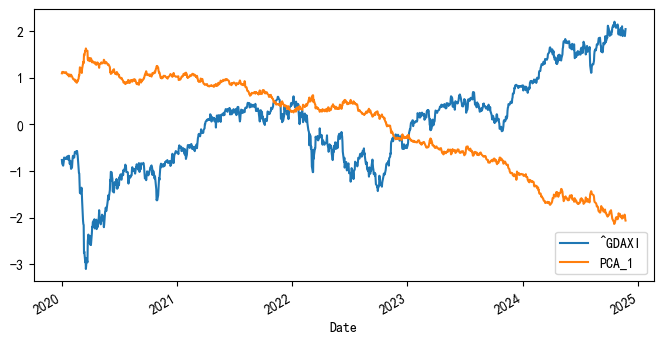

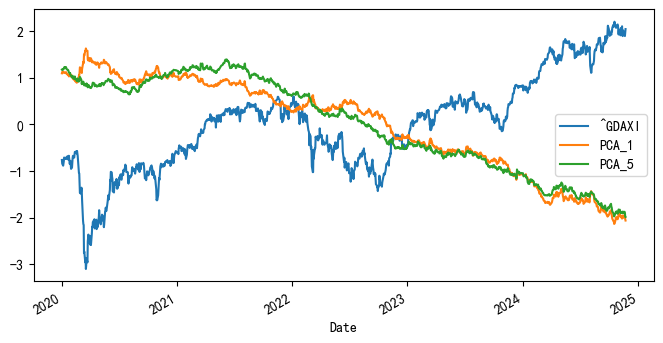

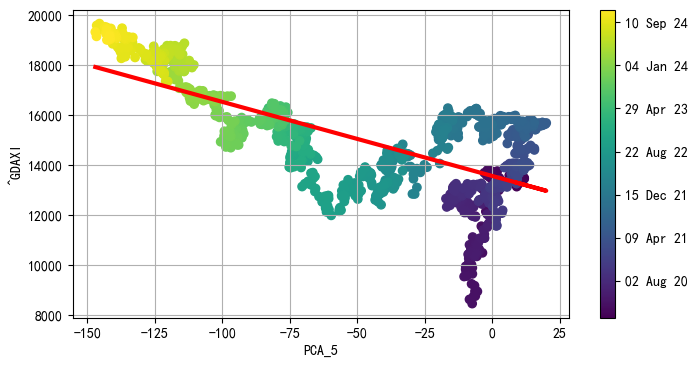

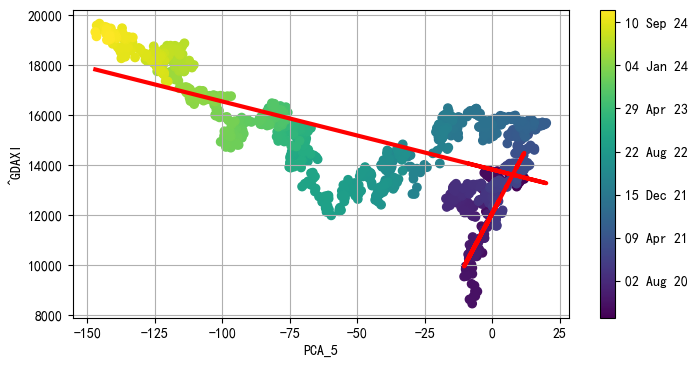

In [ ]:
#%%

# Applying PCA to Financial Data

symbols =  ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
            'BMW.DE', 'CBK.DE', 'CON.DE', 'DB1.DE',
            'DBK.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
            'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
            'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
            'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
            '^GDAXI']

data1= pd.read_csv("./data/FAdata02-2024.csv", encoding = "gbk", index_col=0, parse_dates=True) #从csv读取数据
print(data1.head())

data = data1[symbols]
data = data.dropna()
data.info()
data.head()
dax = pd.DataFrame(data.pop('^GDAXI'))

scale_function = lambda x: (x - x.mean()) / x.std()
pca = KernelPCA().fit(data.apply(scale_function))
len(pca.eigenvalues_)  # 1.0以下用lambdas_
pca.eigenvalues_[:10].round()
get_we = lambda x: x / x.sum()
get_we(pca.eigenvalues_)[:10]
get_we(pca.eigenvalues_)[:5].sum()

# ### Constructing a PCA Index
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

import matplotlib.pyplot as plt
dax.apply(scale_function).plot(figsize=(8, 4))

# title: German DAX index and PCA index with 1 component
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.eigenvalues_)
dax['PCA_5'] = np.dot(pca_components, weights)

import matplotlib.pyplot as plt
dax.apply(scale_function).plot(figsize=(8, 4))
#  title: German DAX index and PCA indices with 1 and 5 components

import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates[:10]

plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# title: DAX return values against PCA return values with linear regression

cut_date = '2020-5-1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# title: DAX index values against PCA index values with early and late regression (regime switch)
plt.show()

In [ ]:
#%%

#############END################